Data from: http://www.sidc.be/silso/datafiles

In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In order to manage our data we are going to use a very important, for an astronomer, library: [astropy](https://www.astropy.org). As usual, there are alternatives, but for tabular data management it is very good. Of course, **astropy** offers many more features.

I first define a function for making plots nicer to view or even, possibly, publication ready.

In [2]:
def SetPlotPars (px,xlbl="",ylbl="",titlbl="",linwidth=2,tickxfonsiz=24,tickyfonsiz=24,xlblfonsiz=30,ylblfonsiz=30,titlblfonsiz=35):
    #
    # Lines
    [i.set_linewidth(linwidth) for i in px.spines.values()]
    #
    # Ticks
    plt.tick_params(axis='both', which='major', labelsize='xx-large')
    plt.tick_params(axis='both', which='minor', labelsize='x-large')
    #
    for tickx,ticky in zip(px.xaxis.get_major_ticks(),px.yaxis.get_major_ticks()):
        tickx.label1.set_fontsize(tickxfonsiz)
        ticky.label1.set_fontsize(tickyfonsiz)
    #
    # Labels
    plt.xlabel(xlbl,fontsize=xlblfonsiz)
    plt.ylabel(ylbl,fontsize=ylblfonsiz)
    plt.title(titlbl,fontsize=titlblfonsiz)
#

## Reading data

**astropy** offers many possibility to read tabular data. Here we have just a text table.

The input text file is shown below:

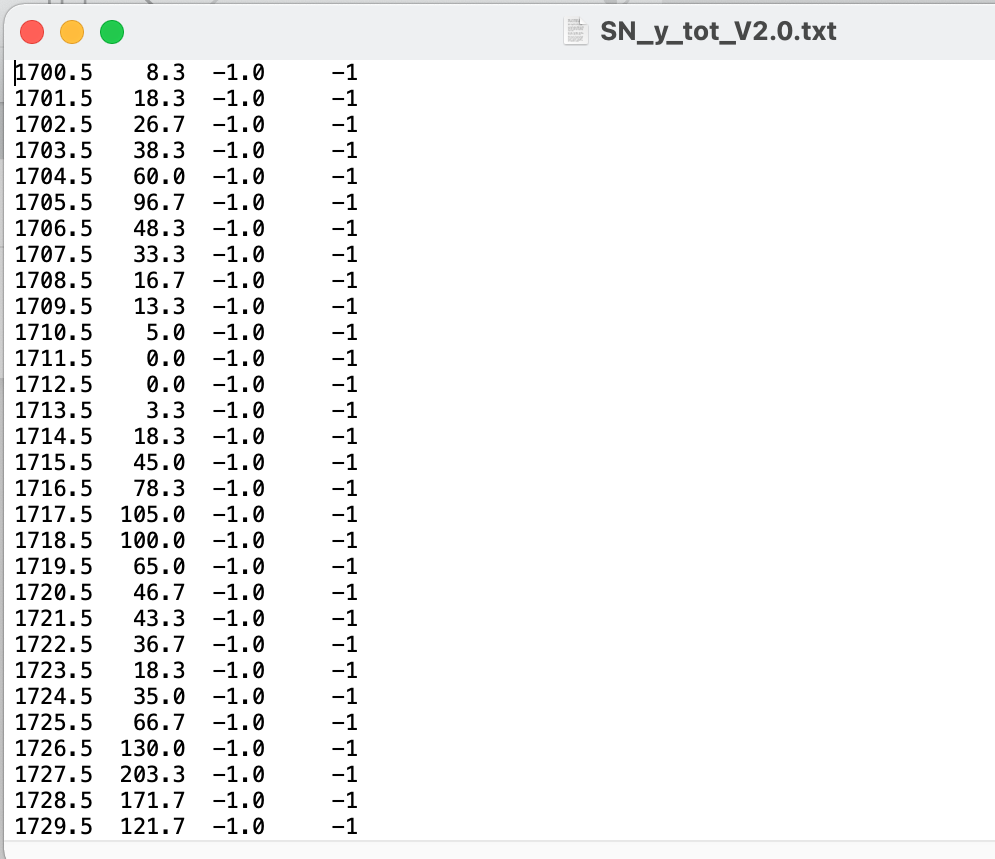

In [3]:
dt = Table.read('SN_y_tot_V2.0.txt',format='ascii')
dt.info

<Table length=320>
name  dtype 
---- -------
col1 float64
col2 float64
col3 float64
col4   int64

The table had almost no ancillary information. We can provide more useful column names.

In [4]:
dt['col1'].name = 'Year'
dt['col2'].name = 'Nmean'
dt['col3'].name = 'Nstd'
dt['col4'].name = 'Nobs'

Then, let's look at the sunspot number time series

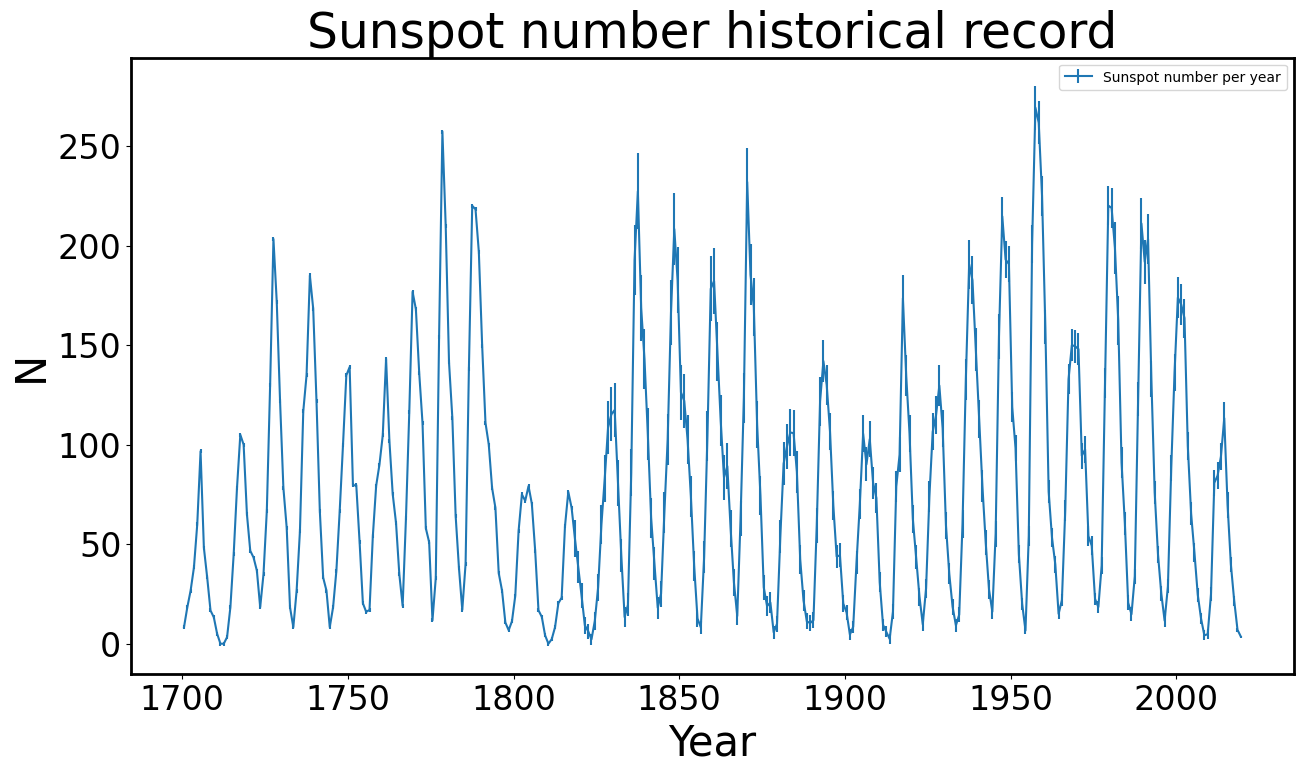

In [5]:
p = plt.figure(figsize=(15,8))
px = p.add_subplot(111)
SetPlotPars(px,"Year","N","Sunspot number historical record")
plt.errorbar(dt['Year'],dt['Nmean'],yerr=abs(dt['Nstd']),label='Sunspot number per year')
plt.legend()
plt.show()

## The DFT

Let's define below a function to compute the DFT. It is just one of many possibilities.

In [6]:
def FourierPeriodogram(t, y):
    N = len(t)
    step = t[1] - t[0]
    frequency = np.fft.fftfreq(N, step)
    y_fft = np.fft.fft(y)
    positive = (frequency > 0)
    return frequency[positive], abs(y_fft[positive]) ** 2

And let's compute the DFT. Given that we have "counts" we use the Leahy (1983) normalization. As you can see, please do not forget that standard DFT cannot deal with uncertainties (in this specific case negligible).

In [8]:
freq, power = FourierPeriodogram(dt['Year'],dt['Nmean'])
power = 2*power/dt['Nmean'].sum()

And let's see the result

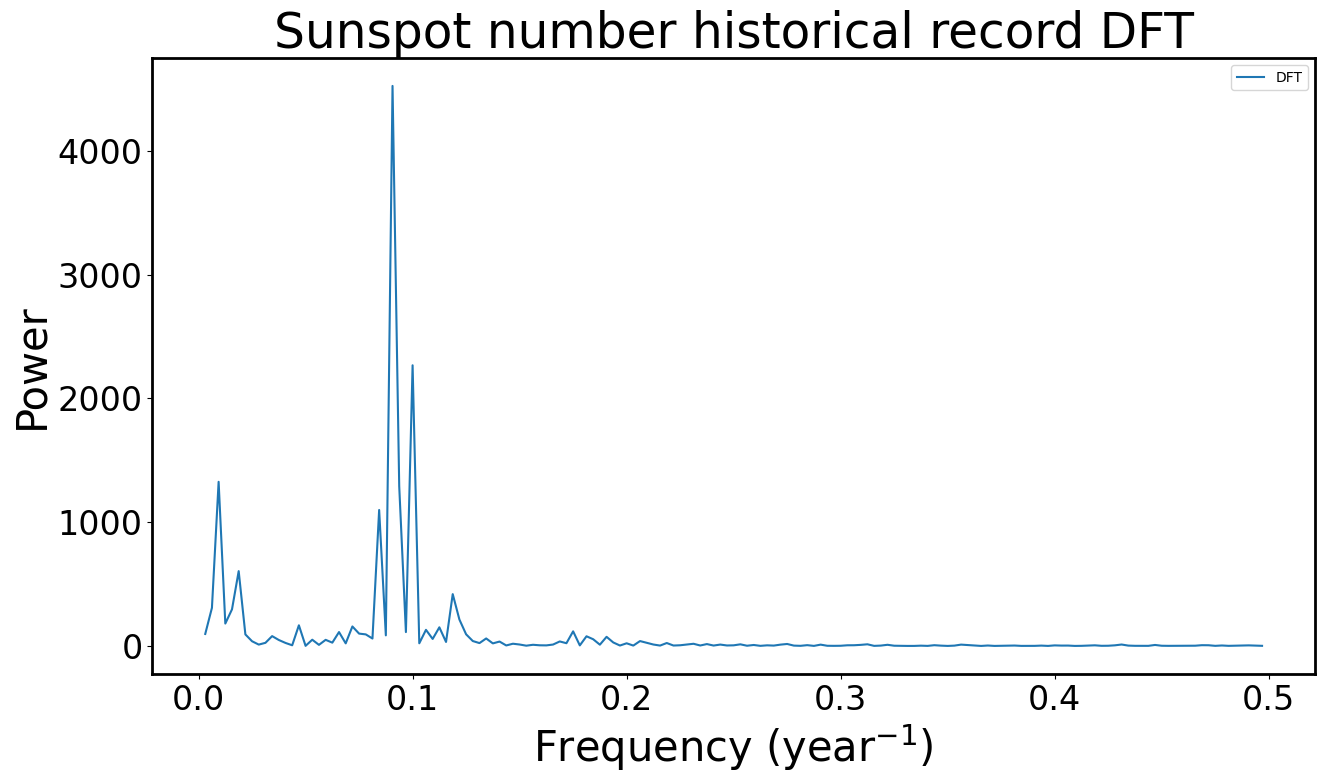

In [9]:
p = plt.figure(figsize=(15,8))
px = p.add_subplot(111)
SetPlotPars(px,"Frequency (year$^{-1}$)","Power","Sunspot number historical record DFT")
plt.plot(freq,power,label="DFT")
plt.legend()
plt.show()

We can also see the periodogram in fuction of the period.

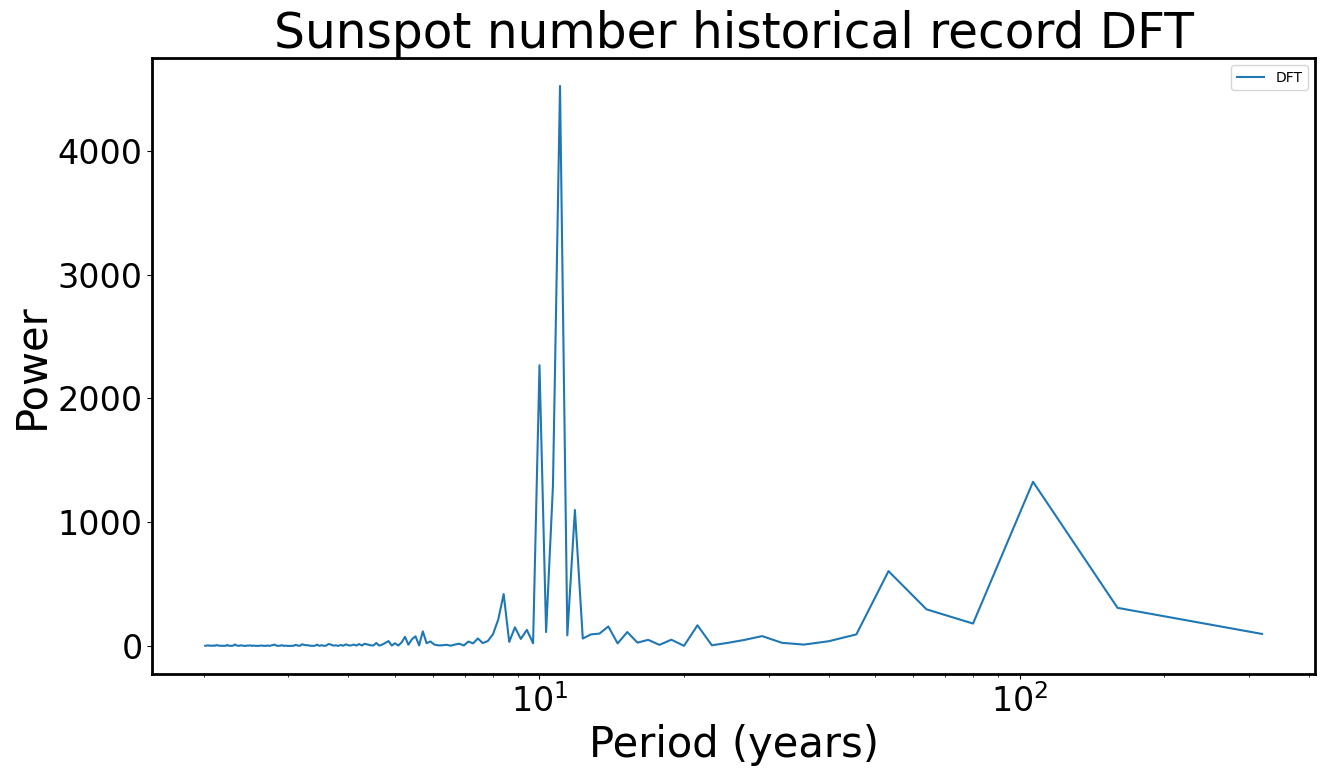

In [10]:
p = plt.figure(figsize=(15,8))
px = p.add_subplot(111)
SetPlotPars(px,"Period (years)","Power","Sunspot number historical record DFT")
plt.plot(1./freq,power,label="DFT")
plt.legend()
plt.semilogx()
plt.show()

We see multiple peaks, and let's see the period corrisponding to them.

In [12]:
fmax = freq[power.argmax()]
pmax = power[power.argmax()]
print("Periodogram maximum period: {:.2f} years".format(1./fmax))

Periodogram maximum period: 11.03 years


**The well known $\sim$ 11 year periodicity!**

The peak(s) look all highly significant. Is that correct? Actually, it is not that simple. Let's plot the periodogram with a logarithmic scale.

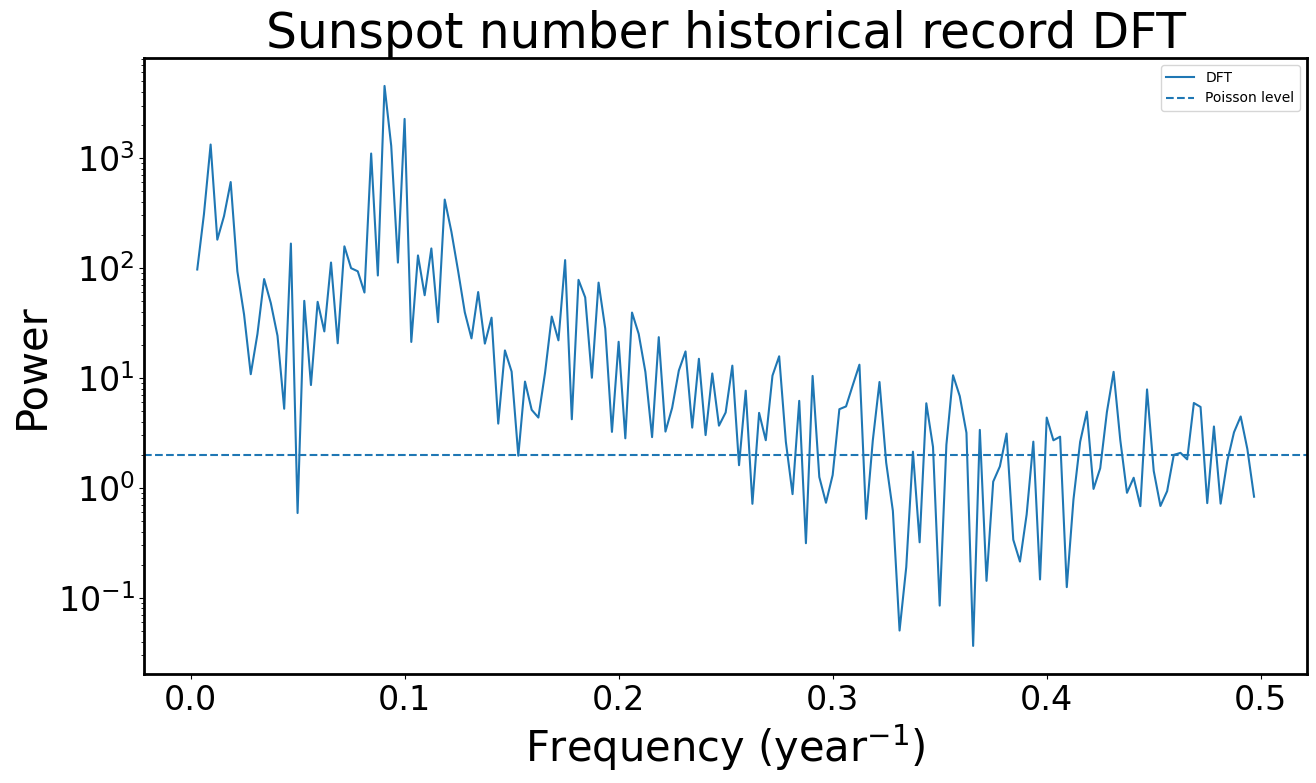

In [13]:
p = plt.figure(figsize=(15,8))
px = p.add_subplot(111)
SetPlotPars(px,"Frequency (year$^{-1}$)","Power","Sunspot number historical record DFT")
plt.plot(freq,power,label="DFT")
plt.axhline(2,label="Poisson level",ls="--")
plt.legend()
plt.semilogy()
plt.show()

As it is now clearly visible, the periodogram is not flat. The power increses toward low frequencies resembling a typical colored noise behavior. A proper analysis for these (quite common indeed) cases requires a modeling of the noise in order to measure how significant any feature is.

## Markdown language basic tutorial?

Try this: https://www.markdownguide.org/basic-syntax/